##HOUSING PROJECT

##saroj, sumina, nabin


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Fish.csv")

Mounted at /content/drive


In [7]:
df_copy=df.copy()

#Data Profiling

In [ ]:

#Creating a copy of csv file
#Csv file ko copy banako
df_copy = df.copy()

#Checking Datatype of column and non null value
#Yo data_set ma kun kun datatype xa bhanera check garey ko
df_copy.info()


#To check the mathmatical values of the data_set
#Data_set ko mathmatical value check garey ko
df_copy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


#Data Quality Check

In [ ]:
#Finding null value in data
df_copy.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [ ]:
#Duplicated data check

print(df_copy.duplicated().sum())

0


#Feature Engineering

In [8]:

# Create length-based features
df_copy['Avg_Length'] = (df_copy['Length1'] + df_copy['Length2'] + df_copy['Length3']) / 3
df_copy['Length_range'] = df_copy['Length3'] - df_copy['Length1']
df_copy['Volume_estimate'] = df_copy['Avg_Length'] * df_copy['Height'] * df_copy['Width']

# Display the new columns
print(df_copy[['Length1', 'Length2', 'Length3', 'Avg_Length', 'Length_range','Volume_estimate']])
df_copy

dfcopy1 = df_copy[['Species','Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
        'Avg_Length', 'Length_range', 'Volume_estimate']]
dfcopy1.info()

     Length1  Length2  Length3  Avg_Length  Length_range  Volume_estimate
0       23.2     25.4     30.0   26.200000           6.8      1213.332480
1       24.0     26.3     31.2   27.166667           7.2      1459.770624
2       23.9     26.5     31.1   27.166667           7.2      1579.127335
3       26.3     29.0     33.5   29.600000           7.2      1678.868044
4       26.5     29.0     34.0   29.833333           7.5      1905.976964
..       ...      ...      ...         ...           ...              ...
154     11.5     12.2     13.4   12.366667           1.9        36.026344
155     11.7     12.4     13.5   12.533333           1.8        38.648664
156     12.1     13.0     13.8   12.966667           1.7        37.077621
157     13.2     14.3     15.2   14.233333           2.0        84.526816
158     13.8     15.0     16.2   15.000000           2.4        82.652854

[159 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (to

In [9]:
print(dfcopy1['Avg_Length'])

0      26.200000
1      27.166667
2      27.166667
3      29.600000
4      29.833333
         ...    
154    12.366667
155    12.533333
156    12.966667
157    14.233333
158    15.000000
Name: Avg_Length, Length: 159, dtype: float64


#Data Visualization of data

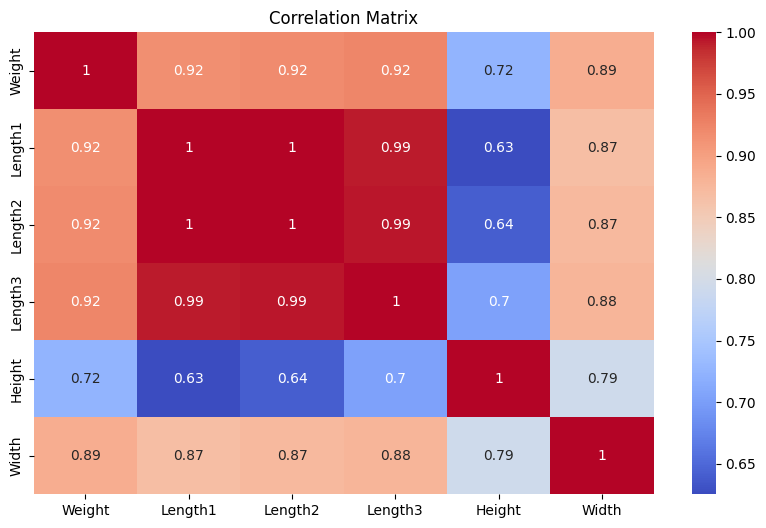

In [10]:
#Correlation matrix of data
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

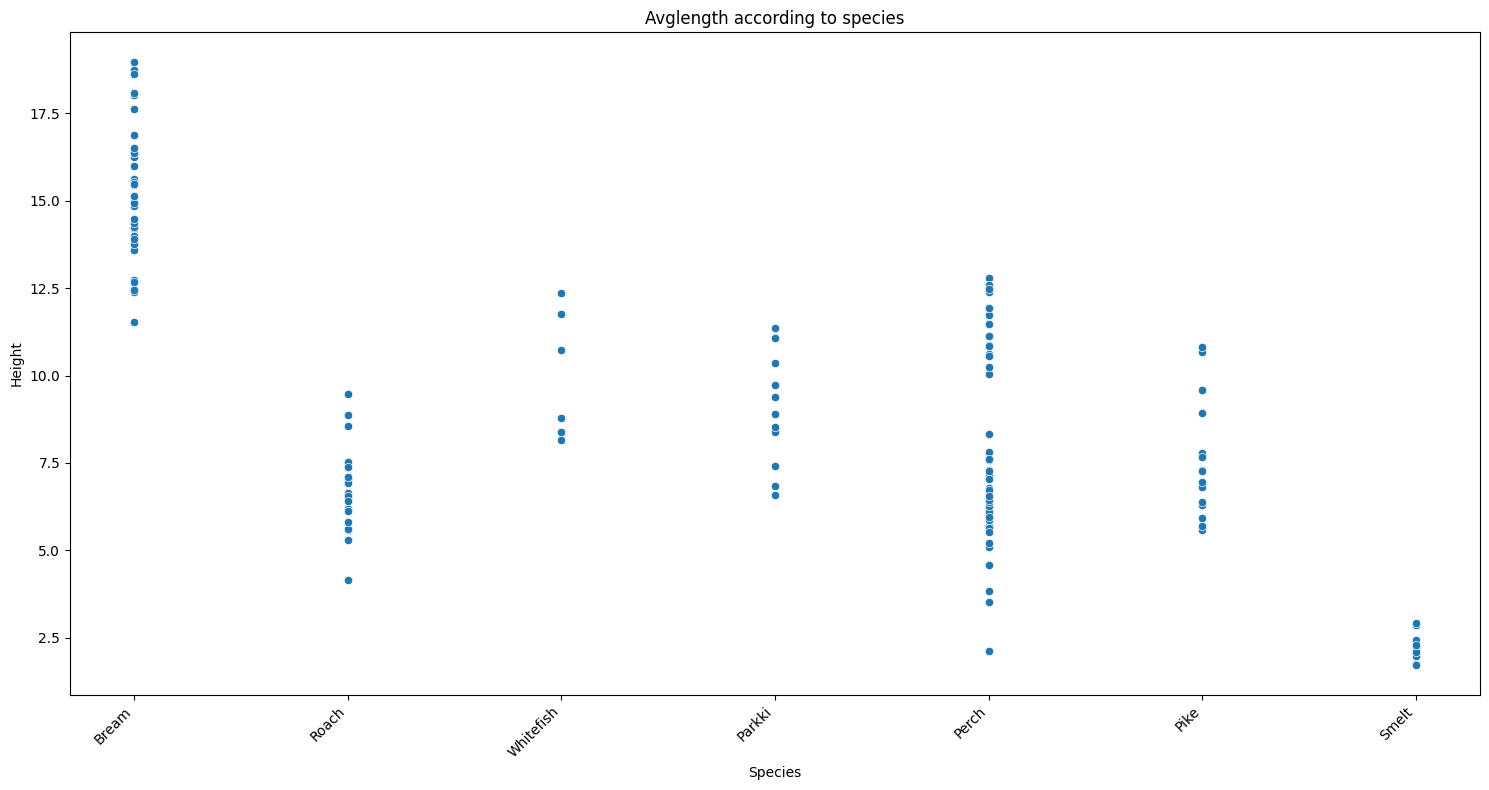

In [11]:
plt.figure(figsize=(15, 8))
# Showing relationship between height and speciesin scatterplot
sns.scatterplot(data=df_copy, x='Species', y='Height')
plt.title('Avglength according to species')
plt.xlabel('Species')
plt.ylabel('Height')
plt.xticks(rotation=45, ha='right')
# Adjust layout to prevent labels overlapping
# Labels haru lai over lap garnu bata rokey ko
plt.tight_layout()
plt.show()

In [12]:
#Finding numerical values in the column and retriving the columns name
#Kun kun columns haru ma number xa vanera tha pauna lai ani tyo colum ko nam nikal na lai
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print(numerical_cols)

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


#Outlier Detection

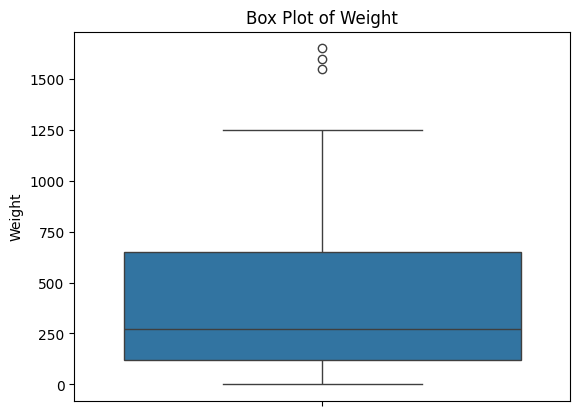

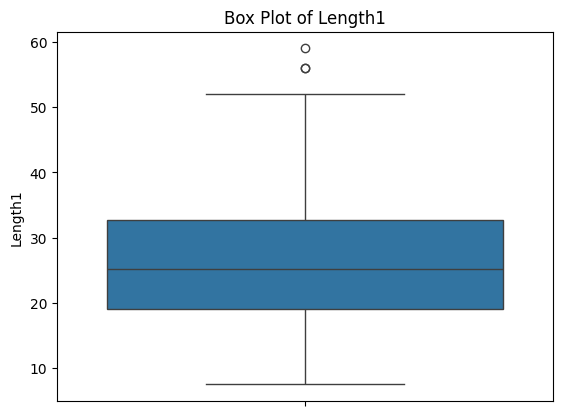

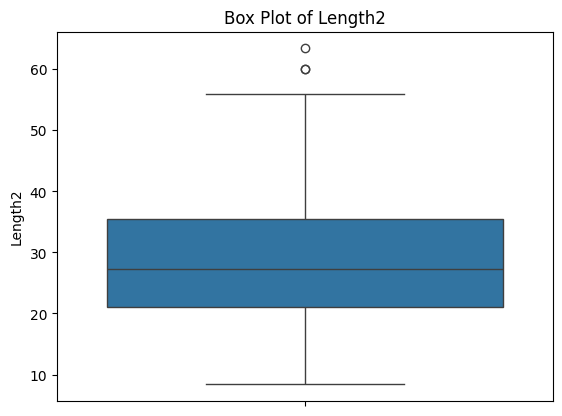

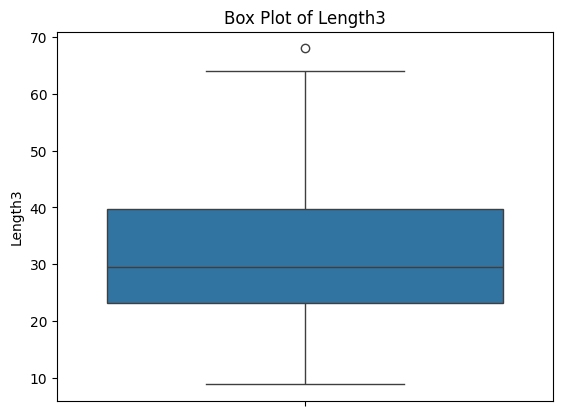

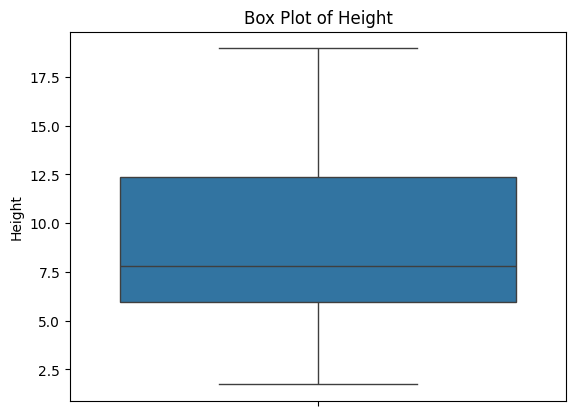

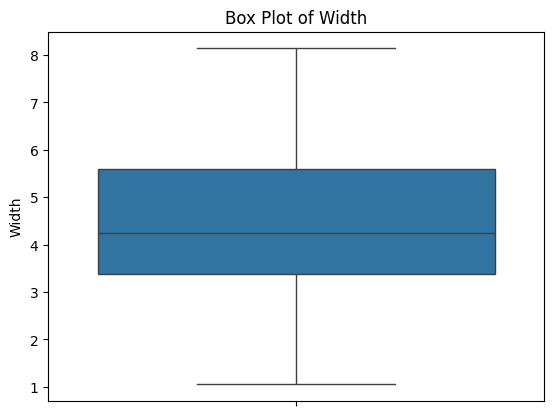

In [ ]:
#To see the outliers in boxplot
#Boxplot outliers ma herna lai
for col in numerical_cols:
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

#Outlier Handling

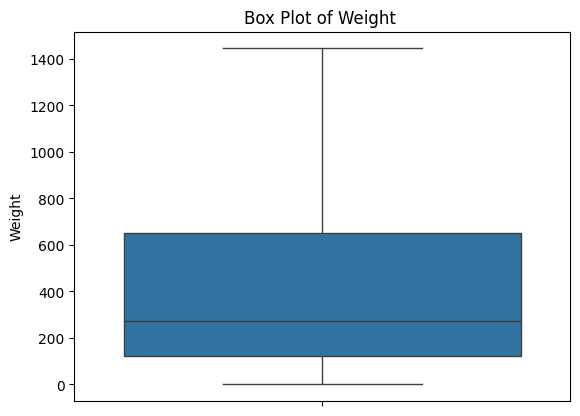

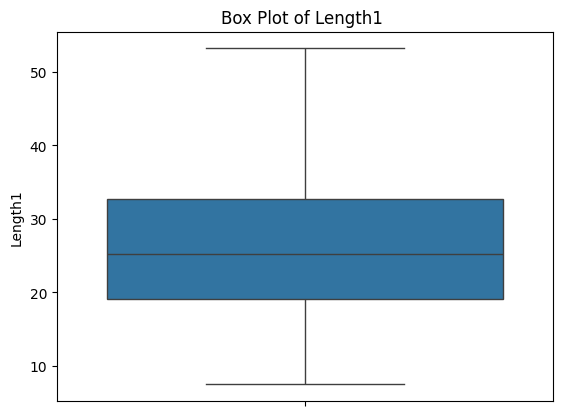

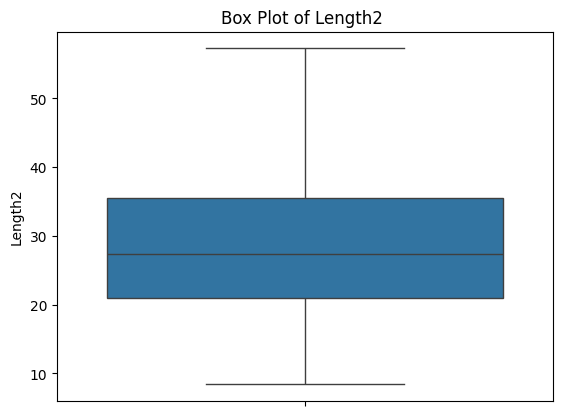

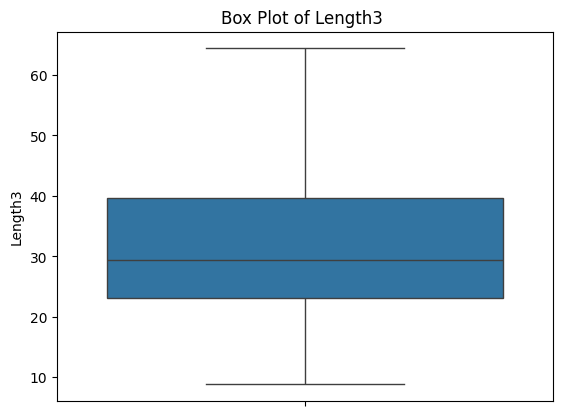

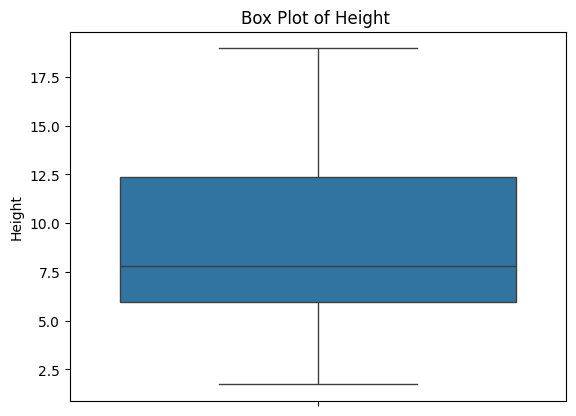

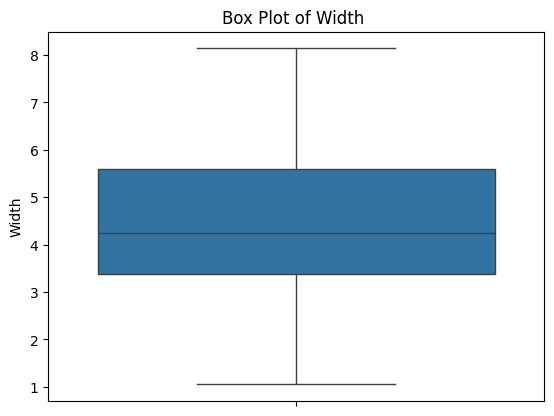

In [ ]:
#To detect outliers
#Outliers haru lai detect garey
outlier_bounds = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }
  # Cap the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                            np.where(df[col] > upper_bound, upper_bound, df[col]))
for col in numerical_cols:
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col} ')
    plt.show()

#Classification(Supervised learning)

In [ ]:
#X = dfcopy1.drop('Species', axis=1)
#y = dfcopy1['Species']


In [28]:
le = LabelEncoder()#tool from scikit-learn used to convert categorical labels into numerical values.
dfcopy1['Species'] = le.fit_transform(dfcopy1['Species'])

In [36]:
print("Encoded labels:", le.fit_transform(dfcopy1['Species']))

Encoded labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]


0=Bream
4=Roach
6=Whitefish
1=parkki
2=perch
3=pike
5=smelt

In [29]:
print(dfcopy1['Species'].head(40))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    4
36    4
37    4
38    4
39    4
Name: Species, dtype: int64


In [30]:
# 3. Split into features and target
X = np.column_stack((dfcopy1[['Weight']] ,dfcopy1['Length1'],dfcopy1[['Length2']],dfcopy1[['Length3']],dfcopy1[['Height']],dfcopy1[['Width']]))
y = np.array(dfcopy1['Species'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
#  Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
model.predict([[23,17,17,9,8,12]])


array([2])

In [38]:
y_pred = model.predict(X_test)

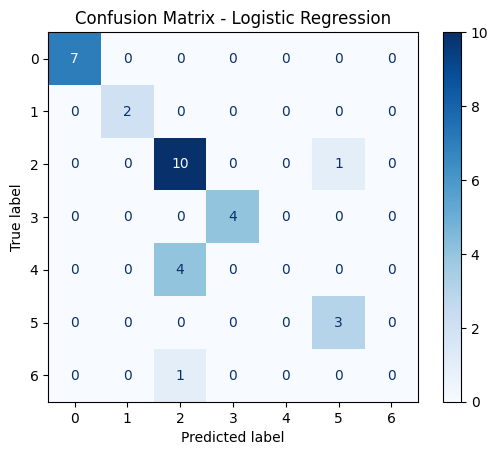

In [39]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()